Created by **Fikri Diva Sambasri**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

# Read Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Mini Project 3/marketing_campaign_data.csv', sep=',')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Info Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [6]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.shape

(2240, 30)

Terdapat missing value pada fitur Income

# Feature Engineering

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Age'] = 2022 - df['Year_Birth']
df['Join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['Total_kids'] > 0, 1, 0)

# group age range
df.loc[(df['Age'] >= 0) & (df['Age'] < 12), 'Age_range'] = 'Child'
df.loc[(df['Age'] >= 12) & (df['Age'] < 18), 'Age_range'] = 'Teens'
df.loc[(df['Age'] >= 18) & (df['Age'] < 36), 'Age_range'] = 'Young adults'
df.loc[(df['Age'] >= 36) & (df['Age'] < 55), 'Age_range'] = 'Middle age adults'
df.loc[(df['Age'] >= 55), 'Age_range'] = 'Older adults'

# amount spent
df['Total_amount_spent'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# total accept campaign
df['Total_accept_campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# total transcation purchased --- I ASSUMED ALL OF THIS PURCHASES ARE MECE (mutually exclusive and collectively exhaustive)
df['Total_transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
# conversion rate
df['Conversion_rate'] = df.apply(lambda x: safe_div(x['Total_transactions'],x['NumWebVisitsMonth']), axis=1)

# Exploratory Data Analysis: conversion rate based on income, spending, and age

## Statistical Summary

In [9]:
# membagi data berdasarkan type datanya
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Join_at_age', 'Total_kids', 'is_parents', 'Total_amount_spent', 'Total_accept_campaign', 'Total_transactions', 'Conversion_rate']
Data category:  ['Education', 'Marital_Status', 'Age_range']


### Numerik Features

In [10]:
df[numerical_cols].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Join_at_age,Total_kids,is_parents,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


Terdapat missing value pada kolom conversion rate dan income

### Categorical Features

In [11]:
df[category_cols].describe()

,Education,Marital_Status,Age_range
count,2240,2240,2240
unique,5,6,3
top,S1,Menikah,Middle age adults
freq,1127,864,1139


## Corelation features

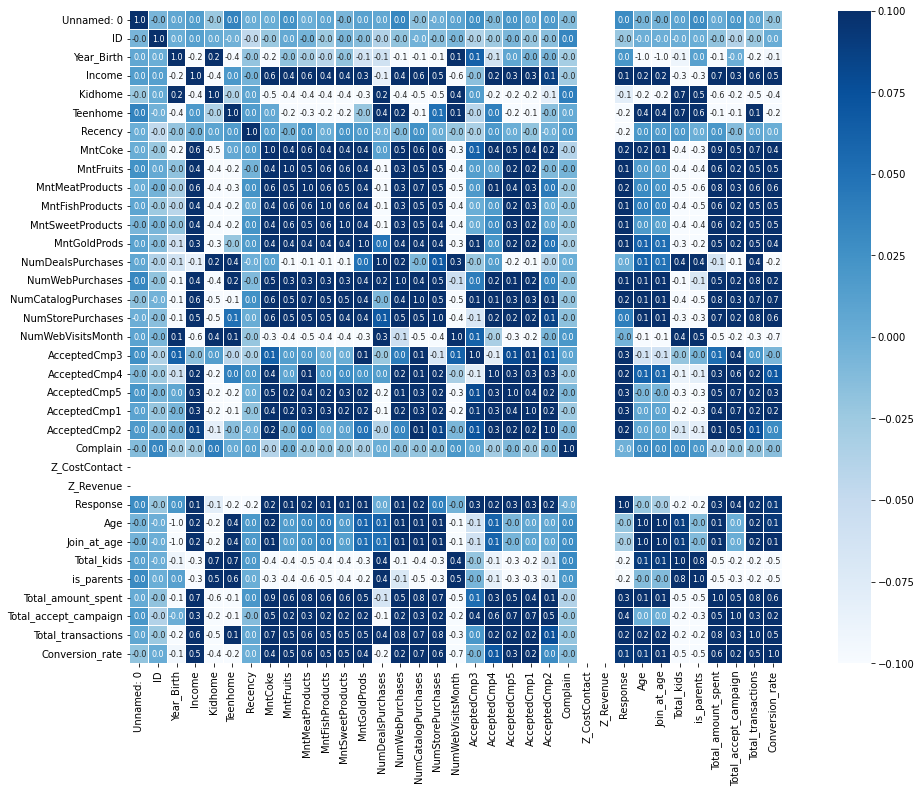

In [12]:
# correlation heatmap
plt.figure(figsize=(20, 12))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

- Fitur conversion rate memiliki korelasi kuat positif terhadap fitur income dan total amount spent (spending).
- Fitur conversion rate memiliki korelasi lemah positif terhadap age

## Income vs Spending

(0.0, 120000000.0)

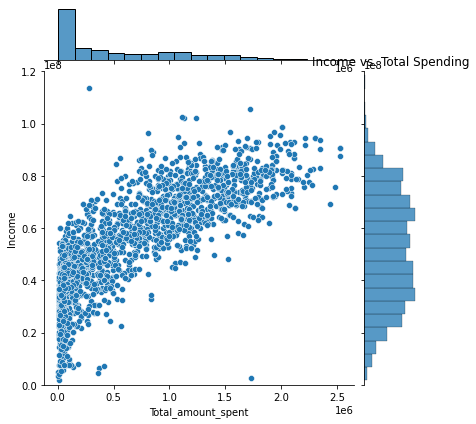

In [13]:
plot = sns.jointplot(x=df["Total_amount_spent"], y=df["Income"])
plt.title('Income vs. Total Spending')
plot.ax_marg_y.set_ylim(0, 120000000)

Terlihat bahwa kedua fitur persebaran datanya adalah berkolerasi kuat positif

## Income vs Conversion Rate

(0.0, 120000000.0)

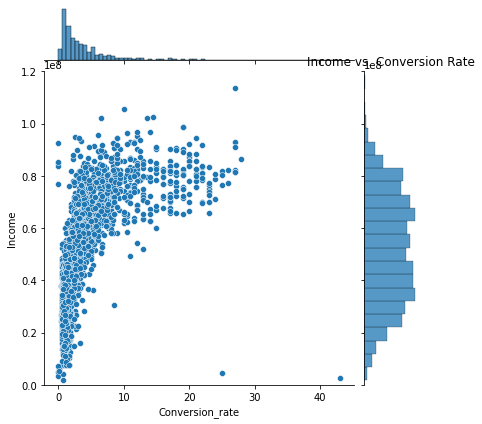

In [14]:
plot = sns.jointplot(x=df["Conversion_rate"], y=df["Income"])
plt.title('Income vs. Conversion Rate')
plot.ax_marg_y.set_ylim(0, 120000000)

## Age vs Spending & Income

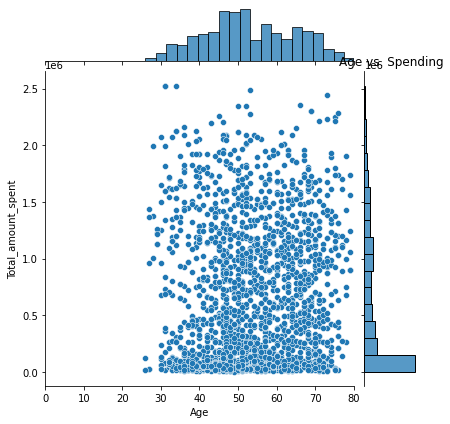

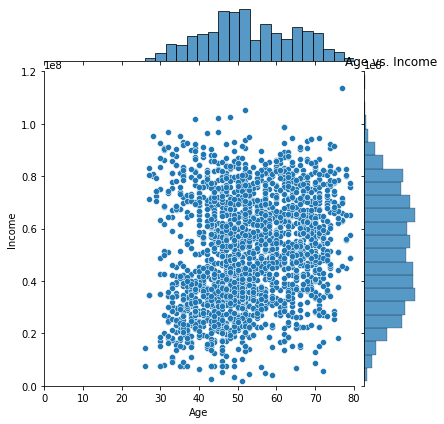

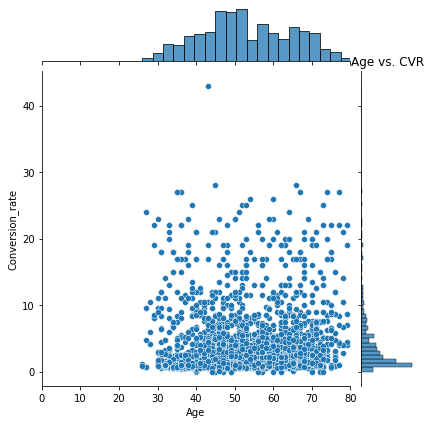

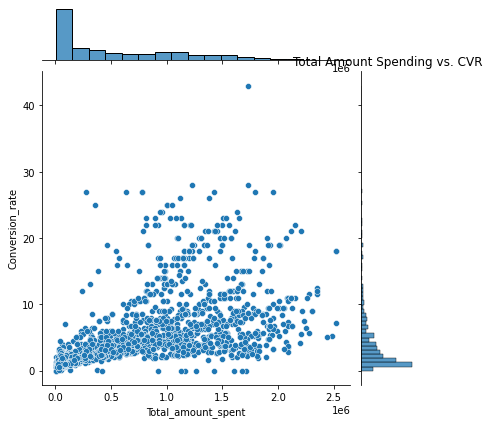

In [15]:
plot = sns.jointplot(x=df["Age"], y=df["Total_amount_spent"])
plt.title('Age vs. Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["Age"], y=df["Income"])
plt.title('Age vs. Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

plot = sns.jointplot(x=df["Age"], y=df["Conversion_rate"])
plt.title('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["Total_amount_spent"], y=df["Conversion_rate"])
plt.title('Total Amount Spending vs. CVR')
# plot.ax_marg_x.set_xlim(0, 80)
plt.show()

Terlihat bahwa fitur Age (umur) tidak menghasilkan korelasi positif kuat atau korelasi negatif kuat

# Data Cleaning and Data Preprocessing

## Cek Duplicated Data

In [16]:
df.duplicated().any()

False

In [17]:
# cek baris duplicated
df[ df.duplicated(keep=False) == True ]

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Join_at_age,Total_kids,is_parents,Age_range,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate


## Cek Data Null

In [18]:
df.isna().sum()

Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Join_at_age               0
Total_kids                0
is_parents                0
Age_range                 0
Total_amount_spent  

## Handling missing value

In [19]:
df = df.dropna()

In [20]:
df.isna().sum()

Unnamed: 0               0
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntCoke                  0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Join_at_age              0
Total_kids               0
is_parents               0
Age_range                0
Total_amount_spent       0
Total_accept_campaign    0
T

## Membuang Data yang tidak perlu

In [21]:
df = df.drop(columns=['Unnamed: 0', 'Recency', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

In [22]:
df.shape

(2216, 33)

## Feature Encoding

In [23]:
for col in category_cols:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column Age_range
Middle age adults    1127
Older adults          943
Young adults          146
Name: Age_range, dtype: int64
------------------------------ 



In [24]:
# label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)

In [25]:
dataset_categorical = df[['Education']].copy()

In [26]:
# One hot encoder
for cat in ['Marital_Status', 'Age_range', 'is_parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dataset_categorical = dataset_categorical.join(onehots)

## Feature Standardization

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2216 non-null   int64  
 1   Education              2216 non-null   object 
 2   Marital_Status         2216 non-null   object 
 3   Income                 2216 non-null   float64
 4   Kidhome                2216 non-null   int64  
 5   Teenhome               2216 non-null   int64  
 6   MntCoke                2216 non-null   int64  
 7   MntFruits              2216 non-null   int64  
 8   MntMeatProducts        2216 non-null   int64  
 9   MntFishProducts        2216 non-null   int64  
 10  MntSweetProducts       2216 non-null   int64  
 11  MntGoldProds           2216 non-null   int64  
 12  NumDealsPurchases      2216 non-null   int64  
 13  NumWebPurchases        2216 non-null   int64  
 14  NumCatalogPurchases    2216 non-null   int64  
 15  NumS

In [28]:
# membagi data berdasarkan type datanya
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['ID', 'Income', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Join_at_age', 'Total_kids', 'is_parents', 'Total_amount_spent', 'Total_accept_campaign', 'Total_transactions', 'Conversion_rate', 'Education_mapped']
Data category:  ['Education', 'Marital_Status', 'Age_range']


In [29]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numerical_cols:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head(3))

(2216, 34)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Join_at_age,Total_kids,is_parents,Age_range,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped
0,-0.019809,S1,Lajang,0.234063,-0.823039,-0.928972,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.986443,0.897752,-1.264803,-1.581389,Older adults,1.675488,-0.439265,1.319446,-0.167630,-0.457733
1,-1.051009,S1,Lajang,-0.234559,1.039938,0.909066,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,1.236801,1.313688,1.405806,0.632356,Older adults,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733
2,-0.445526,S1,Bertunangan,0.769478,-0.823039,-0.928972,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,0.318822,0.315443,-1.264803,-1.581389,Older adults,0.280250,-0.439265,0.797881,0.175797,-0.457733


# Modelling

## Cek Nilai K dengan Elbow Method

[50072.405379773205, 44538.004189819745, 41227.46260281424, 38939.840467861315, 36868.10235465356, 35638.299444578864, 34046.70374606589, 33103.771181709715, 31805.09166929654, 30141.6271650798, 29724.755572679176, 29143.276435306685, 27925.031346133772, 27111.18185684381]


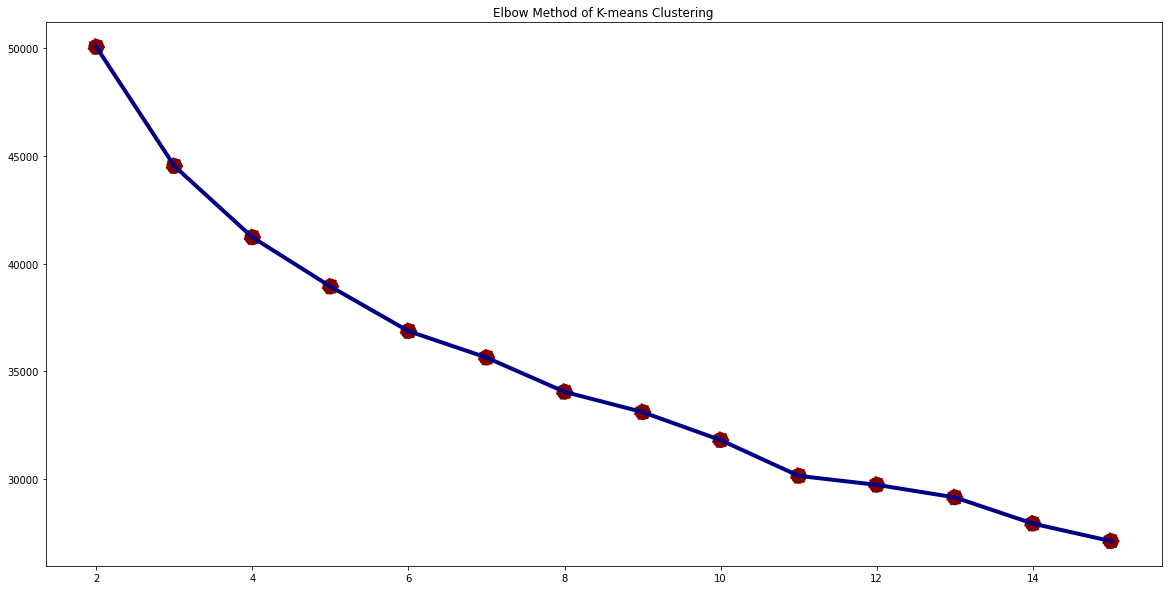

In [30]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=['ID', 'Education', 'Marital_Status', 'Age_range']).copy()
inertia = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 16), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 16), y=inertia, s=300, color='#800000',  linestyle='--')

## K-Means Model

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

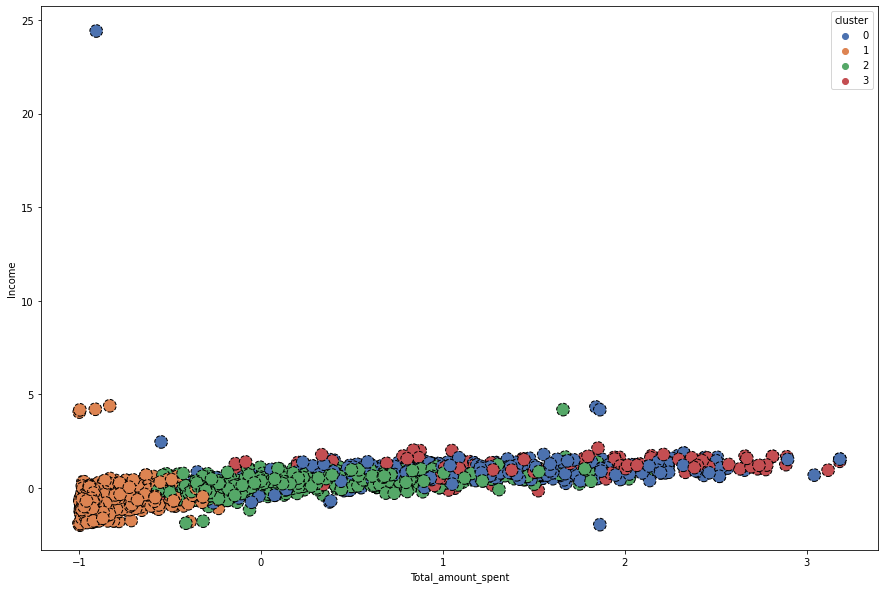

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(
    x="Total_amount_spent", y="Income",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=X,
    palette="deep",
    s=160,
    ax=ax
)

## Evaluation

In [33]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

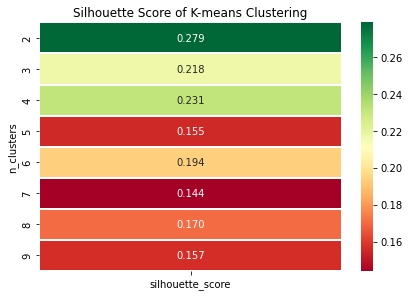

In [34]:
visualize_silhouette_layer(X)

# Interpretasi

In [35]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Join_at_age,Total_kids,is_parents,Age_range,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped,cluster
0,5524,S1,Lajang,58138000.0,0,0,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,65,55,0,0,Older adults,1617000,0,25,3.571429,2,0
1,2174,S1,Lajang,46344000.0,1,1,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,68,60,2,1,Older adults,27000,0,6,1.200000,2,1
2,4141,S1,Bertunangan,71613000.0,0,0,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,57,48,0,0,Older adults,776000,0,21,5.250000,2,0
3,6182,S1,Bertunangan,26646000.0,1,0,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,38,30,1,1,Middle age adults,53000,0,8,1.333333,2,1
4,5324,S3,Menikah,58293000.0,1,0,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,41,33,1,1,Middle age adults,422000,0,19,3.800000,4,2


In [36]:
df_group_cluster = df.groupby(['cluster']).agg({'Total_amount_spent': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max']})
df_group_cluster

Total_amount_spent                                           Income                                                   
                     count          mean     median     min      max  count          mean      median         min          max
cluster                                                                                                                       
0                      428  1.296965e+06  1281500.0   62000  2525000    428  7.557575e+07  74888500.0   2447000.0  666666000.0
1                     1046  1.008614e+05    65000.0    5000   473000   1046  3.512499e+07  34616500.0   1730000.0  162397000.0
2                      611  7.812488e+05   725000.0  232000  2092000    611  5.923169e+07  59462000.0   4428000.0  157243000.0
3                      131  1.582702e+06  1631000.0  265000  2524000    131  8.016937e+07  81929000.0  37929000.0  105471000.0

Melihat dari hasil cluster dengan spending customer. Cluster 0 merupakan customer middle spending. Cluster 1 merupakan customer risk of churn. Cluster 2 merupakan customer low spending. Cluster 3 merupakan customer High spending

In [37]:
map_cluster = {
    0 : 'Middle Spender',
    1 : 'Risk of Churn',
    2 : 'Low Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

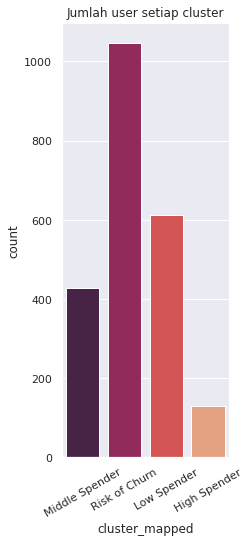

In [38]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df['cluster_mapped'], palette='rocket')
plt.title('Jumlah user setiap cluster')
plt.xticks(rotation=30)
plt.show()

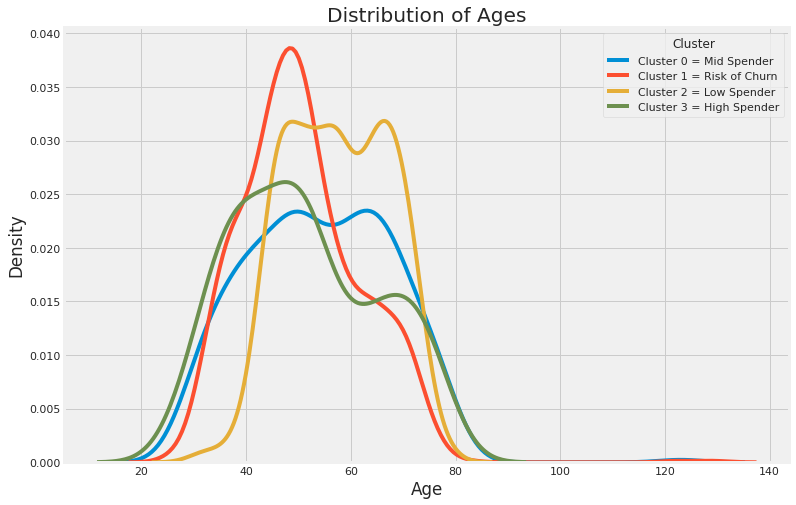

In [39]:
plt.figure(figsize = (13, 8))

plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['cluster'] == 0, 'Age'])
sns.kdeplot(df.loc[df['cluster'] == 1, 'Age'])
sns.kdeplot(df.loc[df['cluster'] == 2, 'Age'])
sns.kdeplot(df.loc[df['cluster'] == 3, 'Age'])

# Labeling of plot

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend(labels=["Cluster 0 = Mid Spender","Cluster 1 = Risk of Churn","Cluster 2 = Low Spender","Cluster 3 = High Spender"], title = "Cluster")
plt.show()

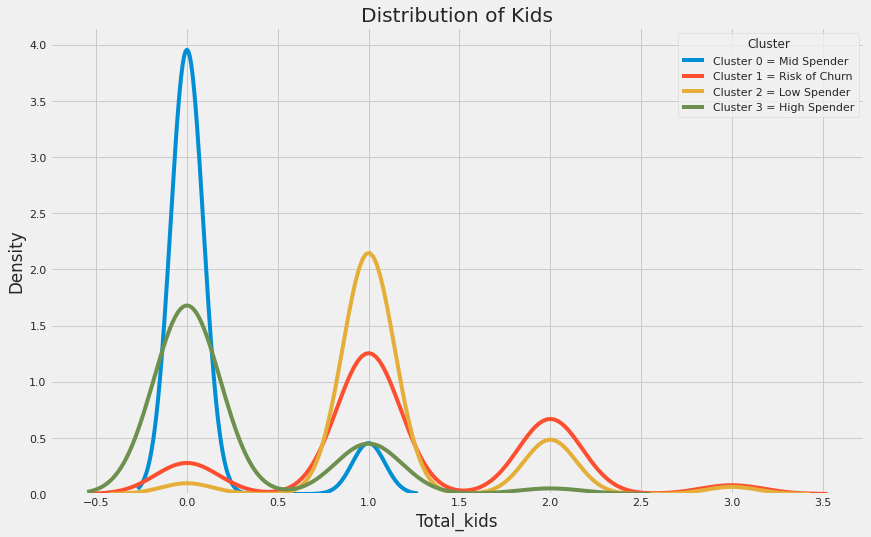

In [47]:
plt.figure(figsize = (13, 8))

plt.style.use('fivethirtyeight')
sns.kdeplot(df.loc[df['cluster'] == 0, 'Total_kids'])
sns.kdeplot(df.loc[df['cluster'] == 1, 'Total_kids'])
sns.kdeplot(df.loc[df['cluster'] == 2, 'Total_kids'])
sns.kdeplot(df.loc[df['cluster'] == 3, 'Total_kids'])

# Labeling of plot

plt.xlabel('Total_kids')
plt.ylabel('Density')
plt.title('Distribution of Kids')
plt.legend(labels=["Cluster 0 = Mid Spender","Cluster 1 = Risk of Churn","Cluster 2 = Low Spender","Cluster 3 = High Spender"], title = "Cluster")
plt.show()

In [48]:
pd.unique(df['Total_kids'])

array([0, 2, 1, 3])

In [49]:
df['Total_kids'].value_counts()

1    1117
0     633
2     416
3      50
Name: Total_kids, dtype: int64

In [51]:
dfc0 = df[df['cluster'] == 0]
dfc1 = df[df['cluster'] == 1]
dfc2 = df[df['cluster'] == 2]
dfc3 = df[df['cluster'] == 3]

In [62]:
dfc0['Age_range'].value_counts()

Older adults         209
Middle age adults    172
Young adults          47
Name: Age_range, dtype: int64

In [63]:
dfc1['Age_range'].value_counts()

Middle age adults    638
Older adults         329
Young adults          79
Name: Age_range, dtype: int64

In [64]:
dfc2['Age_range'].value_counts()

Older adults         361
Middle age adults    246
Young adults           4
Name: Age_range, dtype: int64

In [65]:
dfc3['Age_range'].value_counts()

Middle age adults    71
Older adults         44
Young adults         16
Name: Age_range, dtype: int64

## Income per cluster

Text(0.5, 1.0, 'Income per Cluster')

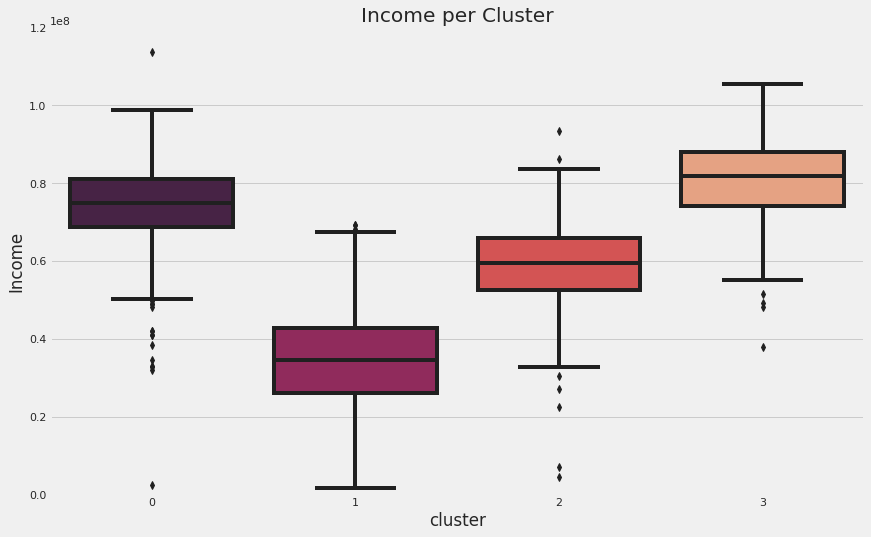

In [57]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Income", data=df, palette='rocket')
plt.ylim(0, 120000000)
plt.title('Income per Cluster')

## Spending per cluster

Text(0.5, 1.0, 'Spending per Cluster')

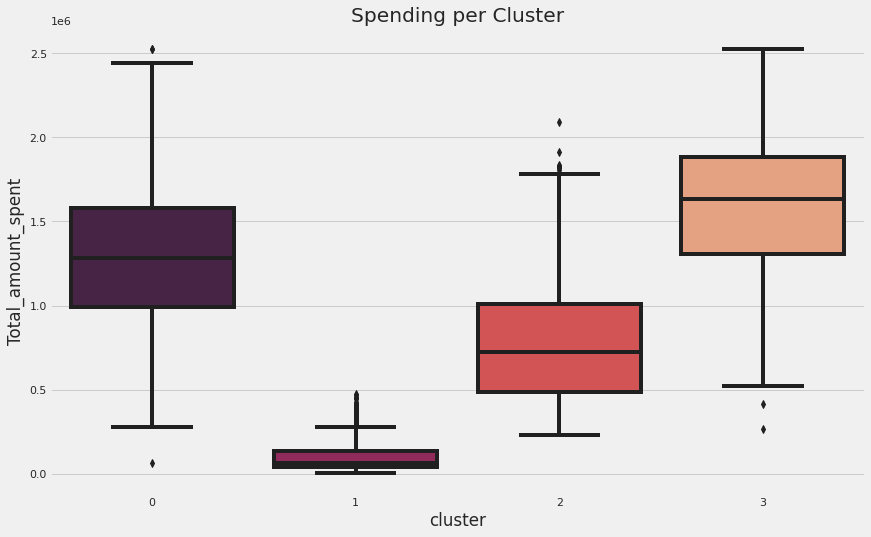

In [58]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Total_amount_spent", data=df, palette='rocket')
plt.title('Spending per Cluster')

## Num visit web per cluster

Text(0.5, 1.0, 'Total visit web per Cluster')

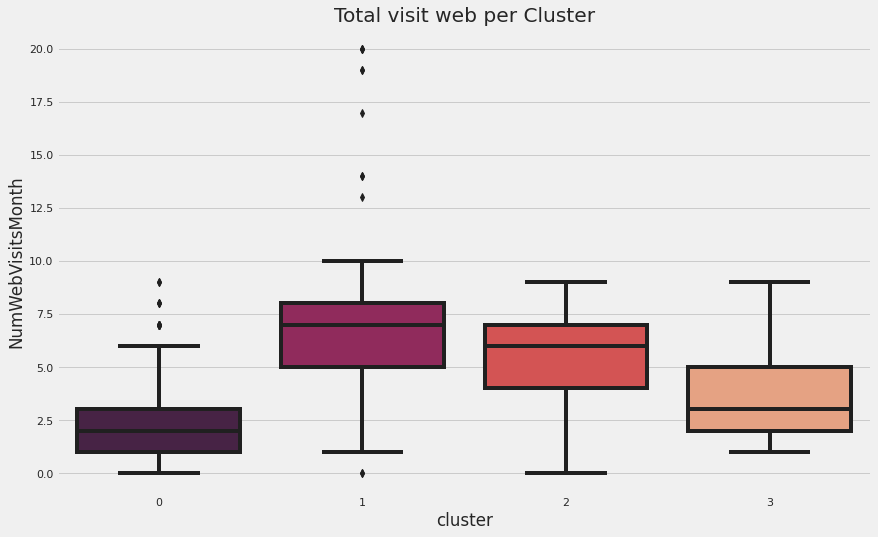

In [59]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="NumWebVisitsMonth", data=df, palette='rocket')
plt.title('Total visit web per Cluster')

## Conversion rate per cluster

Text(0.5, 1.0, 'Conversion rate per Cluster')

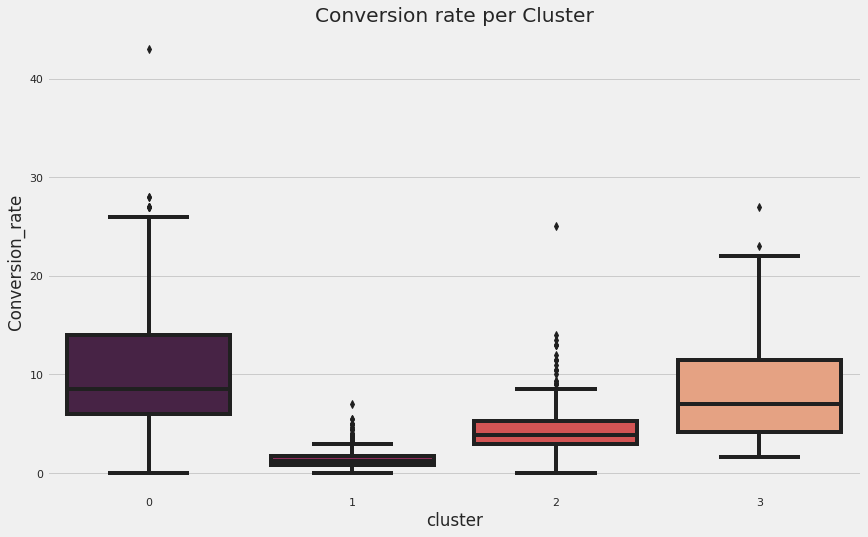

In [60]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="Conversion_rate", data=df, palette='rocket')
plt.title('Conversion rate per Cluster')

## Num Deal Purchases per cluster

Text(0.5, 1.0, 'Total deal purchases per Cluster')

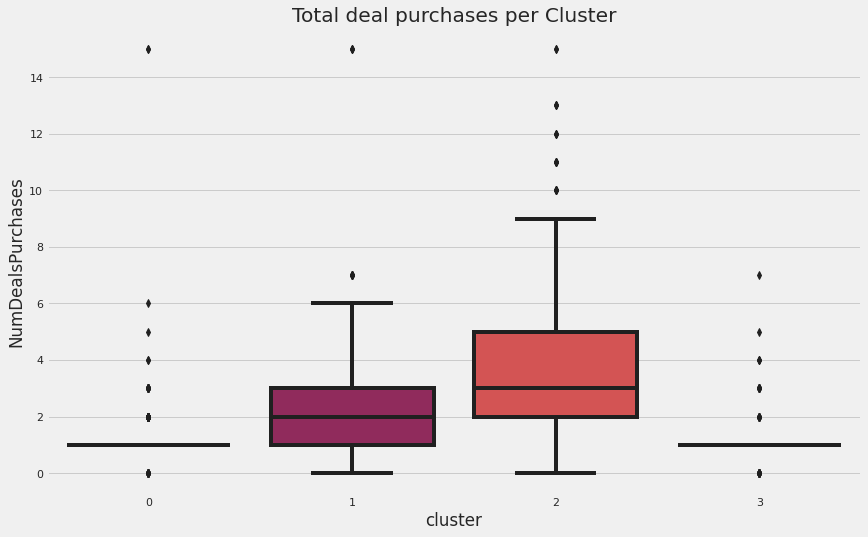

In [61]:
plt.figure(figsize = (13, 8))
sns.boxplot(x="cluster", y="NumDealsPurchases", data=df, palette='rocket')
plt.title('Total deal purchases per Cluster')

# Conclusion

1. Low Spender (Cluster = 2)
Kelompok ini didominasi oleh older adults (>=55 tahun) dan middle adults (36 tahun – 55 tahun) yang dominan memiliki anak 1.
Kelompok ini cukup sering mengujungi website setelah cluster 1 (risk of churn) dengan median 5 kali tiap bulannya.
Kelompok ini memiliki total pendapatan dan total pengeluaran terkecil kedua setelah cluster 1 (rosk of churn).


2. Risk of churn (Cluster = 1)
Kelompok ini didominasi middle adults (36-55) dan older adults (>= 55 tahun) yang dominan memiliki anak dengan jumlah 1 - 2.
Kelompok ini sering mengujungi website dengan median lebih dari 5 kali tiap bulannya.
Kelompok ini memiliki total pendapatan dan total pengeluaran terkecil diantara cluster yang lain.


3. Middle Spender (Cluster = 0)
Kelompok ini didominasi oleh older adults (>=55 tahun) dan middle adults (36 tahun – 55 tahun) yang dominan tidak memiliki anak.
Kelompok ini tidak cukup sering mengunjungi website tiap bulannya.
Kelompok ini memiliki total pendapatan dan total pengeluaran terbesar setelah cluster 3 (High Spender).


4. High Spender (Cluster = 3)
Kelompok ini didominasi middle adults (36-55) yang dominan tidak memiliki anak.
Kelompok ini cukup sering mengujungi website setelah cluster 0 (Middle Spender) dengan median 3 kali tiap bulannya.
Kelompok ini memiliki total pendapatan dan total pengeluaran paling tinggi diantara cluster yang lainnya.
